# Collect Class Infomation
Class data is collected from the OSU course catalog and the barrett.3 course information website.
The OSU course catalog has useful and clean data on where classes/labs/recitations are, their start and end dates, and times;
however, their enrollment data is not useful since it aggregates enrollments of all sections of a course into one number.
barrett.3's data has enrollment info on each individual section for a course.

In [ ]:
import requests
import json
import os
import shutil
import pandas as pd
from datetime import datetime, time
from time import sleep

In [ ]:
barret_subjects = [
    'ACADAFF', 'ACCAD', 'ACCTMIS', 'ACEL', 'AEDECON', 'AEE', 'AEROENG', 'AFAMAST', 'AGRCOMM', 'AGSYSMGT', 'AGSYSMT', 'AIRSCI', 'ALLIMED', 'ANATOMY', 'ANESTHES', 'ANIMSCI', 'ANMLTEC', 'ANTHROP', 'ARABIC', 'ARCH', 'ART', 'ARTEDUC', 'ARTSCOL', 'ARTSSCI', 'ASE', 'ASL', 'ASTRON', 'ATHTRNG', 'ATMOSSC', 'AVIATION', 'AVIATN', 'BCS', 'BIOCHEM', 'BIOCHEMP', 'BIOETHC', 'BIOLOGY', 'BIOMEDE',
    'BIOMINF', 'BIOMSCI', 'BIOPHRM', 'BIOPHYS', 'BIOSCI', 'BIOSTAT', 'BIOTECH', 'BIOWMGT', 'BMEA', 'BMI', 'BSGP', 'BUSADM', 'BUSFIN', 'BUSMGT', 'BUSMHR', 'BUSML', 'BUSOBA', 'BUSTEC', 'CATALAN', 'CBE', 'CBG', 'CHBE', 'CHEM', 'CHEMPHY', 'CHINESE', 'CIRTECH', 'CIVILEN', 'CLAS', 'CLASSICS', 'CLLC', 'COMLDR', 'COMM', 'COMPSTD', 'CONSCI', 'CONSYSM', 'CONSYSMT', 'CRPLAN', 'CRPSOIL', 'CSCFFS',
    'CSCFMFNS', 'CSE', 'CSFMRSM', 'CSFRST', 'CSFSNRTS', 'CSHSPMG', 'CSTW', 'CSTXTCL', 'CZECH', 'DANCE', 'DENT', 'DENTHYG', 'DESIGN', 'DNE', 'DSABLST', 'EALL', 'EARTHSC', 'EARTHSCI', 'ECE', 'ECON', 'EDUCST', 'EDUPAES', 'EDUPL', 'EDUTL', 'EEOB', 'EEURLL', 'EHE', 'EMERGMED', 'ENGINEER', 'ENGLISH', 'ENGR', 'ENGRAPH', 'ENGREDU', 'ENGRTEC', 'ENGTECH', 'ENR', 'ENTMLGY', 'ENTOMOL', 'ENVENG', 'ENVSCI',
    'ENVSCT', 'ESCE', 'ESCFE', 'ESEADM', 'ESEPHL', 'ESEPOL', 'ESEPSY', 'ESETEC', 'ESHESA', 'ESLTECH', 'ESPHE', 'ESQREM', 'ESQUAL', 'ESSPED', 'ESSPSY', 'ESTEPL', 'ESWDE', 'EXP', 'EXPLORNG', 'FABENG', 'FAES', 'FCSED', 'FDSCTE', 'FILMSTD', 'FMRESM', 'FRENCH', 'FRIT', 'GENBIOL', 'GENCHEM', 'GENCOMM', 'GENED', 'GENHUM', 'GENMATH', 'GENSSC', 'GENSTDS', 'GEODSCIE', 'GEODSCIM', 'GEOG', 'GEORGIAN', 'GEOSCIM',
    'GERMAN', 'GRADSCH', 'GRADTDA', 'GREEK', 'HCINNOV', 'HCS', 'HDFS', 'HEBREW', 'HECCREG', 'HIMS', 'HINDI', 'HISTART', 'HISTORY', 'HONORS', 'HORTTEC', 'HOSPMGT', 'HSMP', 'HTHRHSC', 'HUMANEC', 'HUMCOL', 'HUMNNTR', 'HUNGARIN', 'HUNGRN', 'HW', 'HWIH', 'IBGP', 'INDENG', 'INTMED', 'INTSTDS', 'ISE', 'ISLAM', 'ITALIAN', 'JAPANESE', 'JAPANSE', 'JEWSHST', 'KINESIO', 'KNHES', 'KNOW', 'KNPE', 'KNSFHP',
    'KNSISM', 'KOREAN', 'LABBIOSC', 'LARCH', 'LATIN', 'LAW', 'LING', 'LINGUIST', 'MATH', 'MATSCEN', 'MBA', 'MCDBIO', 'MCR', 'MDN', 'MDRNGRK', 'MEATSCI', 'MECHENG', 'MEDCOLL', 'MEDDIET', 'MEDIEVAL', 'MEDLBS', 'MEDMCIM', 'MEDREN', 'MEDTECH', 'MICRBIO', 'MICRBIOL', 'MILSCI', 'MOLBIOC', 'MOLBIOCH', 'MOLGEN', 'MPSCOL', 'MUSIC', 'MVIMG', 'MVNGIMG', 'NAVALSC', 'NELC', 'NEURO',
    'NEUROGS', 'NEUROGSP', 'NEUROSC', 'NEURSGY', 'NRSADVN', 'NRSPRCT', 'NUCLREN', 'NURSING', 'NURSPRCT', 'OCCTHER', 'OPTHLMOL', 'OPTOM', 'OPTOMTRY', 'ORIENTAT', 'OSBP', 'OTOLARN', 'OTOLARYN', 'PATHOL', 'PDATRICS', 'PEDS', 'PERSIAN', 'PHARMACY', 'PHARMCL', 'PHARMCOL', 'PHILOS', 'PHR', 'PHYSICS', 'PHYSIO', 'PHYSIOCB', 'PHYSMED', 'PHYSTHER', 'PHYSTHR', 'PLNTBIO', 'PLNTPTH', 'POLISH', 'POLITSC', 'PORTGESE',
    'PORTGSE', 'PSYBHLH', 'PSYCH', 'PSYCHTRY', 'PUBAFRS', 'PUBHBIO', 'PUBHEHS', 'PUBHEPI', 'PUBHHBP', 'PUBHHMP', 'PUBHLTH', 'PUBPOLM', 'QUECHUA', 'RADIOLG', 'RADIOLGY', 'RADSCI', 'RELSTDS', 'RESPTHER', 'RESPTHR', 'RNEWNRG', 'ROMANIA', 'ROMANIAN', 'ROMLING', 'ROOM', 'RURLSOC', 'RUSSIAN', 'SANSKRIT', 'SANSKRT', 'SASIA', 'SBSCOL', 'SCANDNAV', 'SCANDVN', 'SCHOLAR', 'SLAVIC', 'SOCIOL', 'SOCWORK', 'SOMALI',
    'SPANISH', 'SPHHRNG', 'SRBCROA', 'STAT', 'STEP', 'SUMMARY', 'SURGERY', 'SWAHILI', 'SWEDISH', 'SXLTYST', 'TECPHYS', 'THEATRE', 'TIBETAN', 'TURKISH', 'TXTLCLO', 'URDU', 'USAS', 'UZBEK', 'VETBIOS', 'VETCLIN', 'VETPREV', 'VISSCI', 'VMCOLL', 'VOCEDUC', 'WELDENG', 'WGSST', 'WOMSTDS', 'YIDDISH', 'YORUBA', 'ZULU'
]

url = 'https://content.osu.edu/v2/classes/search'
params = {
    'q': '', # Query
    'client': 'class-search-ui',
    'campus': 'col',
    'term': 1252, # SP25=1252, SU25=1254, AU25=1258
    'p': 1, # Page
    'subject': ''
}
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:136.0) Gecko/20100101 Firefox/136.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br, zstd',
    'Origin': 'https://classes.osu.edu',
    'DNT': '1',
    'Sec-GPC': '1',
    'Connection': 'keep-alive',
    'Referer': 'https://classes.osu.edu/',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'Priority': 'u=0'
}

osu_subjects = []
with open('osu_subjects.json', 'r') as f:
    osu_subjects_info = json.load(f)
for s in osu_subjects_info:
    osu_subjects.append(s['term'])

### Collect Data from OSU Course Catalog

In [ ]:
total_items = 0
all_courses = []
all_sections = []
for subject in osu_subjects:
    current_page = 1
    subject_courses = []
    subject_sections = []
    params['subject'] = subject
    params['p'] = current_page

    try:
        r = requests.get(url, params, headers=headers)
    except TimeoutError as er:
        print(f'Timed out on subject {subject} on page {current_page}')
        sleep(5)
    if r.status_code != 200:
        print(f'ERROR {r.status_code} getting subject: "{subject}"')
        continue
    data = r.json()['data']
    subject_total_items = data['totalItems']
    total_items += subject_total_items
    total_pages = data['totalPages']

    while current_page <= total_pages:
        subject_courses.extend(data['courses'])
        current_page += 1
        params['p'] = current_page
        try:
            r = requests.get(url, params, headers=headers)
        except TimeoutError as er:
            print(f'Timed out on subject {subject} on page {current_page}')
            sleep(5)
        if r.status_code != 200:
            print(f'ERROR {r.status_code} getting subject: "{subject}" at page ')
            continue
        data = r.json()['data']
    
    for course in subject_courses:
        for section in course['sections']:
            section['catalogNumber'] = f'{course['subject']} {course['catalogNumber']}'
            section['title'] = course['title']
            subject_sections.append(section)

    if len(subject_sections) != subject_total_items:
        print(f'{subject} item count mismatch. Expected {subject_total_items}, found {len(subject_sections)} items')
        continue
    all_courses.extend(subject_courses)
    all_sections.extend(subject_sections)
    sleep(0.1)

In [ ]:
all_sections = []
for course_info in all_courses:
    course = course_info['course']
    for section in course_info['sections']:
        section['catalogNumber'] = f'{course['subject']} {course['catalogNumber']}'
        section['title'] = course['title']
        all_sections.append(section)

In [ ]:
all_meetings = []
for section in all_sections:
    for meeting in section['meetings']:
        if 'instructors' in meeting:
            meeting.pop('instructors')
        meeting['term'] = section['term']
        meeting['catalogId'] = section['catalogNumber']
        meeting['classTitle'] = section['title']
        meeting['classNumber'] = section['classNumber']
        meeting['section'] = section['section']
        meeting['sectionEnrollment'] = section['enrollmentTotal']
        all_meetings.append(meeting)

In [ ]:
meetings_df = pd.DataFrame(all_meetings)

In [ ]:
del all_sections
del section
del meeting
del course
del course_info
del r
del f
del s
del subject_courses
del subject_sections

### Collect Data from barrett.3's Catalog

In [ ]:
# Download and save text files
for s in barret_subjects:
    url = f'https://www.asc.ohio-state.edu/barrett.3/schedule/{s}/{params['term']}.txt'
    r = requests.get(url)

    if r.status_code != 200:
        print(f'{r.status_code}\t{s}')
        continue

    with open(os.path.join('Courses', f'{s}.txt'), 'wb') as course_file:
        course_file.write(r.content)
    sleep(0.1)

In [ ]:
# Read each text file and convert to into a dataframe
course_files = os.listdir('Courses')
column_widths = [20, 10, 2, 17, 9, 12, 11, 7, 100]
colspec = [
    (0, 20),
    (20, 25),
    (25, 31),
    (31, 34),
    (34, 49),
    (49, 58),
    (59, 70),
    (70, 81),
    (81, 89),
    (89, 94),
    (94, 200)
]
all_courses_df = pd.DataFrame()
for course_file_name in course_files:
    footer_start = 0
    path = os.path.join('Courses', course_file_name)
    with open(path, 'r') as course_file:
        for line_num, line in enumerate(course_file, start=1):
            if "INDependent study classes" in line:
                footer_start = line_num
    
    if not footer_start:
        skipfooter = 0
    else:
        skipfooter = line_num - footer_start + 1
    
    df = pd.read_fwf(path, skipfooter=skipfooter, skiprows=3, header=None, colspecs=colspec)
    if df.empty:
        continue
    df = df.dropna(subset=0).reset_index(drop=True)
    df.rename({
            0: 'course',
            1: 'campus',
            2: 'class_number',
            3: 'component',
            4: 'auto_enrolls',
            5: 'days',
            6: 'times',
            7: 'location',
            8: 'enrolled_status',
            9: 'waitlist',
            10: 'instructor'
        }, inplace=True, axis=1
    )
    df[['enrolled', 'limit']] = df['enrolled_status'].str.split('/', expand=True)
    df.drop('enrolled_status', axis=1, inplace=True)
    all_courses_df = pd.concat([all_courses_df, df], ignore_index=True)

In [ ]:
# Filter out all online courses and regional campus courses
all_courses_df.drop_duplicates(inplace=True)
filtered_courses = all_courses_df[
    (all_courses_df['location'] != 'ONLINE') &
    (all_courses_df['enrolled'] != '0') &
    (all_courses_df['campus'].isnull()) &
    (all_courses_df['location'].notnull())
]
filtered_courses = filtered_courses.astype({
    'enrolled': 'Int16',
    'limit': 'Int16',
    'class_number': 'Int32'
})
filtered_courses = filtered_courses[['course', 'class_number', 'enrolled', 'limit']]

In [ ]:
meetings_df = meetings_df.astype({
    'classNumber': 'Int32',
    'sectionEnrollment': 'Int32'
})

In [ ]:
# Merge the two data sets, some courses are lost in this process but it's negligible
merged = pd.merge(
    left=filtered_courses,
    right=meetings_df,
    left_on='class_number',
    right_on='classNumber',
    how='inner'
)
merged = merged[
    (merged['facilityDescription'] != 'ONLINE') &
    (merged['facilityDescription'].notnull())
]

In [ ]:
merged.to_csv('class_data.csv', index=False)

In [ ]:
# Delete all the downloaded files
shutil.rmtree('Courses')

### Retrieve Course Locations

In [ ]:
import json
import pandas as pd
import geopandas as gpd

In [ ]:
with open('osu_buildings.json', 'r') as f:
    buildings = json.load(f)
del f
class_data_df = pd.read_csv('class_data.csv')
buildings_gdf = gpd.GeoDataFrame.from_features(buildings['features'], crs='EPSG:4326')

In [ ]:
bldng_name_map = {
  "Drinko Hall, John Deaver": "Drinko Hall",
  "Scott Lab": "Scott Laboratory",
  "Phys Activ & Educ Srvs Bldg": "Physical Activity and Education Services - PAES",
  "Chem & Biomolecular Eng & Chem": "CBEC",
  "18th Avenue Library": "Eighteenth Avenue Library",
  "Theatre, Film & Media Arts Bld": "Theatre, Film and Media Arts Building",
  "McPherson Chemical Lab": "McPherson Chemical Laboratory",
  "Parker Food Science & Tech": "Parker Food Science and Technology",
  "Heffner Wetland Rsch & Educ": "Heffner Wetland Research and Education",
  "Williams Hall": "William Hall Complex - Neil Building",
  "209 West Eighteenth Avenue": "Eighteenth Ave, 209 W",
  "Edison Joining Technology Cntr": "Edison Joining Technology Center",
  "Agricultural Engineering Bldg": "Agricultural Engineering Building",
  "Davis Heart & Lung Research": "Davis Heart and Lung Research Institute",
  "Recreation & Phys Activ Ctr": "Recreation and Physical Activity Center",
  "Veterinary Med Academic Bldg": "Veterinary Medicine Academic",
  "Gerlach Graduate Programs Bldg": "Gerlach Hall",
  "Kinnear Road, 1315": "Kinnear Rd, 1315",
  "Fisher Hall, Max M": "Fisher Hall",
  "Celeste Laboratory Of Chem": "Celeste Laboratory of Chemistry",
  "Outpatient Care East": "James Outpatient Care",
}

In [ ]:
merged = pd.merge(
    left=class_data_df.replace({'facilityDescription': bldng_name_map}),
    right=buildings_gdf,
    left_on='facilityDescription',
    right_on='BLDG_NAME',
    how='left'
)
merged = merged[merged['BLDG_NAME'].notnull()]
merged = merged[list(class_data_df.columns) + ['Latitude', 'Longitude']]

In [ ]:
merged.to_csv('class_data_with_coords.csv', index=False)

# Parse Traffic Data (ABANDONED)

### Split sidewalk centerline data into segments so that it can be graded


In [ ]:
import geopandas as gpd
import json
from shapely.geometry import LineString, Point
from shapely import set_srid, segmentize
from shapely.ops import split, snap

In [ ]:
TARGET_LENGTH = 75 # meters

In [ ]:
with open('sidewalk_centerline_data.json', 'r') as f:
    sidewalk = json.load(f)
del f

In [ ]:
def splitlines(dataframe, segment_length):
    """Function to return a list of an input line, split at each vertex"""
    line = dataframe.geometry  #Extract the geometry
    segmentized = line.segmentize(segment_length) #Insert vertices every x distance
    line_segments = [LineString([p1,p2]) for p1, p2 in zip(segmentized.coords, segmentized.coords[1:])] #zip the coordinates and create linestrings
    return line_segments #Return the list of line segments

def split_line_by_point(line, point, tolerance: float=1.0e-12):
    return split(snap(line, point, tolerance), point)

def cut(line, distance, lines = []):
    # Cuts a line in several segments at a distance from its starting point
    
    if not isinstance(line, LineString):
        line = line.geometry
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])
                ]
        if pd > distance:
            cp = line.interpolate(distance)
            lines.append(LineString(coords[:i] + [(cp.x, cp.y)]))
            line = LineString([(cp.x, cp.y)] + coords[i:])
            if line.length > distance:
                cut(line, distance, lines)
            else:
                lines.append(LineString([(cp.x, cp.y)] + coords[i:]))
            return lines

In [ ]:
gdf = gpd.GeoDataFrame.from_features(sidewalk['features'], crs='EPSG:4326')
gdf = gdf.to_crs('EPSG:3857')
gdf = gdf.explode()

In [ ]:
segment_series = gdf.apply(lambda x: split_line_by_point(x, TARGET_LENGTH), axis=1)
segmented_gdf = gpd.GeoDataFrame(geometry=segment_series.explode())
segmented_gdf = segmented_gdf.explode()
segmented_gdf.reset_index(drop=True, inplace=True)
segmented_gdf.set_crs('EPSG:3857', inplace=True)

# Calculate Traffic

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools
from operator import itemgetter
from shapely.geometry import Point, shape
from shapely.ops import nearest_points
from shapely.geometry import LineString
from datetime import datetime, timedelta, time
from collections import defaultdict
from tqdm import tqdm
from scipy.spatial import KDTree, cKDTree


### Exponential Decay and Spatial Influence
#### Exponential Decay
$`T(t)=T_0\cdot e^{-kt}`$  
Where $`T_0`$ is the initial traffic  
$`k`$ is decay rate  
$`t`$ is time since class ended/began (in minutes)  

#### Spatial Influence
$`S(d)=S_0\cdot e^{-md}`$  
Where $`S_0`$ is the initial spatial influence  
$`m`$ is how fast the effect fades with distance  
$`d`$ is the distance from the class location  (meters)

In [ ]:
def apply_time(t):
    if isinstance(t, str):
        return datetime.strptime(t, '%I:%M %p').time()
    return t

def apply_date(d):
    if isinstance(d, str):
        return datetime.strptime(d, '%Y-%m-%d').date()
    return d

def get_weekdays(class_row):
    weekdays = []
    for i, day in enumerate(['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']):
        if day not in class_row:
            continue
        if class_row[day]:
            weekdays.append(i)
    return weekdays

def features_within_radius(gdf: gpd.GeoDataFrame, point: Point, radius: float):
    if not isinstance(point, Point):
        raise ValueError("point must be a shapely.geometry.Point")

    buffer = point.buffer(radius)  # Create buffer around the point
    return gdf[gdf.intersects(buffer)]  # Filter features that intersect with the buffer

In [ ]:
df_classes = pd.read_csv("class_data_with_coords.csv")
df_classes = df_classes.sort_values('enrolled', ascending=False).drop_duplicates(subset='class_number').head(5000).reset_index(drop=True)
geometry = [Point(xy) for xy in zip(df_classes['Longitude'], df_classes['Latitude'])]
gdf_classes = gpd.GeoDataFrame(df_classes, geometry=geometry, crs="EPSG:4326")
gdf_classes.set_crs('EPSG:4326')
gdf_classes = gdf_classes.to_crs('EPSG:3857')

gdf_routes = gpd.read_file("trimmed_sidewalk_centerline_data.json")
gdf_routes.set_crs('EPSG:4326')
gdf_routes = gdf_routes.to_crs('EPSG:3857')

In [ ]:
# Convert time str to time, date str to date
gdf_classes['startTime'] = gdf_classes['startTime'].apply(lambda x: apply_time(x))
gdf_classes['endTime'] = gdf_classes['endTime'].apply(lambda x: apply_time(x))
gdf_classes['startDate'] = gdf_classes['startDate'].apply(lambda x: apply_date(x))
gdf_classes['endDate'] = gdf_classes['endDate'].apply(lambda x: apply_date(x))

gdf_routes["traffic"] = 0

# Convert time columns to datetime
df_classes["startTime"] = pd.to_datetime(df_classes["startTime"])
df_classes["endTime"] = pd.to_datetime(df_classes["endTime"])

# Create a column in routes to store traffic
gdf_routes["traffic"] = 0  

current_time = datetime.now()

In [ ]:
# Add traffic model to routes
class_start = gdf_classes['startDate'].min().isoformat()
class_end = gdf_classes['endDate'].max().isoformat(),
gdf_routes['traffic_model'] = gdf_routes.apply(
    lambda row: {
        "start_date": class_start,
        "end_date": class_end,
        "weekly_pattern": {i: defaultdict(float) for i in range(7)}
    }, 
    axis=1
)

In [ ]:

def update_traffic_model(model: dict, weekday, time_str, adjusted_traffic):
    model["weekly_pattern"][weekday][time_str] += adjusted_traffic
    return model


def time_decay(num_students, elapsed_time, peak_time=10):
    if elapsed_time < 0:
        return 0  # No early arrivals (can modify if needed)

    # Gaussian decay to simulate peak-time crowd behavior
    sigma = peak_time / 2  # Spread of the distribution
    decay_factor = np.exp(-0.5 * (elapsed_time / sigma) ** 2)  # Gaussian decay

    return num_students * decay_factor

def spatial_decay(class_location, route_gdf, total_traffic, elapsed_time, time_interval=5, decay_rate=0.1, movement_rate = 200):
    radius = max(movement_rate * (elapsed_time / time_interval), movement_rate)
    nearby_features = features_within_radius(route_gdf, class_location, radius)

    decay_factor = np.exp(-decay_rate * radius)
    adjusted_traffic = total_traffic * decay_factor

    return nearby_features, adjusted_traffic

def update_weekly_pattern(route_gdf, t, class_location, total_traffic, weekday, elapsed_time):
    affected_features, adjusted_traffic = spatial_decay(class_location, route_gdf, total_traffic, elapsed_time)
    time_str = t.strftime("%H:%M")
    if affected_features.empty:
        return route_gdf
    affected_features["traffic_model"] = affected_features["traffic_model"].apply(lambda x: update_traffic_model(x, weekday, time_str, adjusted_traffic))

    route_gdf.loc[affected_features.index, "traffic_model"] = affected_features["traffic_model"]
    
    return route_gdf

def spatial_decay_2(class_location, route_gdf, total_traffic, iteration, movement_rate, inverse_exp_rate):
    radius = max(iteration * movement_rate, 50)
    nearby_features = features_within_radius(route_gdf, class_location, radius)

    decay_factor = np.exp(iteration * (1 / inverse_exp_rate))
    adjusted_traffic = total_traffic * decay_factor

    return nearby_features, adjusted_traffic


def update_weekly_pattern_2(route_gdf, t, class_location, total_traffic, weekday, iteration, inverse_exp_rate = 2, movement_rate = 50):
    affected_features, adjusted_traffic = spatial_decay_2(class_location, route_gdf, total_traffic, iteration, movement_rate=movement_rate, inverse_exp_rate=inverse_exp_rate)
    
    if affected_features.empty or int(adjusted_traffic) < 5:
        return route_gdf  # Early exit to avoid unnecessary processing

    time_str = t.strftime("%H:%M")

    # Vectorized update instead of apply (avoids Python loops)
    affected_features["traffic_model"] = [
        update_traffic_model(model, weekday, time_str, adjusted_traffic)
        for model in affected_features["traffic_model"]
    ]

    # Efficient bulk update
    route_gdf.update(affected_features[["traffic_model"]])

    return route_gdf

In [ ]:
time_interval = 5 # every 5 minutes

for _, class_row in tqdm(gdf_classes.iterrows(), total=gdf_classes.shape[0]):
    class_days = get_weekdays(class_row)
    class_location = class_row['geometry']
    num_students = class_row["enrolled"]

    if pd.isna(class_row["startTime"]) or pd.isna(class_row["endTime"]):
        continue
    start_time = datetime.strptime(class_row["startTime"].isoformat(), '%H:%M:%S')
    end_time = datetime.strptime(class_row["endTime"].isoformat(), '%H:%M:%S')
    
    for weekday in class_days:
        for i, minutes in enumerate(range(0, 50, time_interval)):
            # Backwards time decay, as start time nears, more students will be near location. Lower rate and slower
            t = start_time - timedelta(minutes=minutes)
            update_weekly_pattern_2(gdf_routes, t, class_location, int(num_students * 0.8), weekday, i, 8)
            #entering_traffic = time_decay(int(num_students * 0.5), minutes, peak_time=1.5)
            #gdf_routes = update_weekly_pattern(gdf_routes, t, class_location, entering_traffic, weekday, elapsed_time=50-minutes)

            #affected_features, adjusted_traffic = spatial_decay(class_location, gdf_routes, entering_traffic, 50-minutes)
            #time_str = t.strftime("%H:%M")
            #if affected_features.empty:
            #    continue
            #affected_features["traffic_model"] = affected_features["traffic_model"].apply(lambda x: update_traffic_model(x, weekday, time_str, adjusted_traffic))
            #gdf_routes.loc[affected_features.index, "traffic_model"] = affected_features["traffic_model"]
        
        for i, minutes in enumerate(range(0, 30, time_interval)):
            # Forward time decay, fast decay, higher traffic
            t = end_time + timedelta(minutes=minutes)
            update_weekly_pattern_2(gdf_routes, t, class_location, num_students, weekday, i)
            #exiting_traffic = time_decay(num_students, minutes)
            #gdf_routes = update_weekly_pattern(gdf_routes, t, class_location, exiting_traffic, weekday, elapsed_time=minutes)

            #affected_features, adjusted_traffic = spatial_decay(class_location, gdf_routes, exiting_traffic, minutes)
            #time_str = t.strftime("%H:%M")
            #if affected_features.empty:
            #    continue
            #affected_features["traffic_model"] = affected_features["traffic_model"].apply(lambda x: update_traffic_model(x, weekday, time_str, adjusted_traffic))
            #gdf_routes.loc[affected_features.index, "traffic_model"] = affected_features["traffic_model"]

        
        #for minutes in range(-10, 25, time_interval):
        #    t = start_time + timedelta(minutes=minutes)
        #    elapsed_start = (t - start_time).total_seconds() / 60
        #    elapsed_end = (t - end_time).total_seconds() / 60
        #
        #    entering_traffic = time_decay(num_students, elapsed_start) if elapsed_start >= 0 else 0
        #    exiting_traffic = time_decay(num_students, elapsed_end) if elapsed_end >= 0 else 0
        #    total_traffic = entering_traffic + exiting_traffic
        #    gdf_routes = update_weekly_pattern(gdf_routes, t, class_location, total_traffic, weekday)

In [32]:
def apply_to_dict(x):
    x['weekly_pattern'] = dict(x['weekly_pattern'])
    return dict(x)

In [33]:
gdf_routes.to_crs('EPSG:4326', inplace=True)
gdf_routes['traffic_model'] = gdf_routes['traffic_model'].apply(lambda x: apply_to_dict(x))

In [34]:
gdf_routes.to_file('traffic_data3.json', driver='GeoJSON', index=False)

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast
from collections import defaultdict
import re

In [36]:
# Load GeoJSON file
gdf = gpd.read_file("traffic_data3.json")
gdf['traffic_model'] = gdf['traffic_model'].apply(lambda x: dict(eval(re.sub(r"<class '(\w+)'>", r'\1', x))))

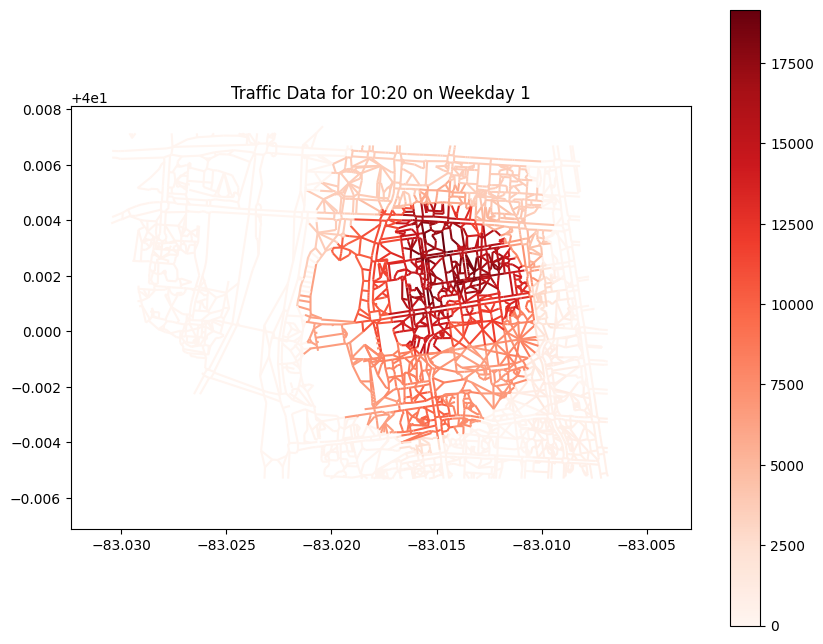

In [37]:

# Function to extract traffic for a specific time
def extract_traffic(feature, weekday, time):
    weekly_pattern = feature["weekly_pattern"]
    if weekday in weekly_pattern and time in weekly_pattern[weekday]:
        return weekly_pattern.get(weekday, {}).get(time, 0)
    return 0

# Select weekday and time (Example: Monday at 09:00)
weekday = 1  # 0 = Sunday, 1 = Monday, etc.
time = "10:20"

# Apply traffic extraction
gdf["traffic_at_time"] = gdf["traffic_model"].apply(lambda x: extract_traffic(x, weekday, time))

# Plot the map with traffic data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#ax.set_xlim(-83.0127, -83.0193)  # minx, maxx
#ax.set_ylim(40.0011, 40.0044)  # miny, maxy
ax.set_xlim(-83.0324, -83.0029)  # minx, maxx
ax.set_ylim(39.9929, 40.0081)  # miny, maxy
gdf.plot(column="traffic_at_time", cmap="Reds", legend=True, ax=ax)
plt.title(f"Traffic Data for {time} on Weekday {weekday}")
plt.show()

In [ ]:
gdf[gdf['traffic_at_time'] == gdf['traffic_at_time'].iloc[0]]